In [72]:
import deepdish as dd
import os
import numpy as np
import pylab as plt
import seaborn as sns
import h5py
import pandas as pd
from astropy.cosmology import Planck18 as cosmo
from glob import glob

In [73]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import detectors, detector_psds

In [74]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Plot noise curves

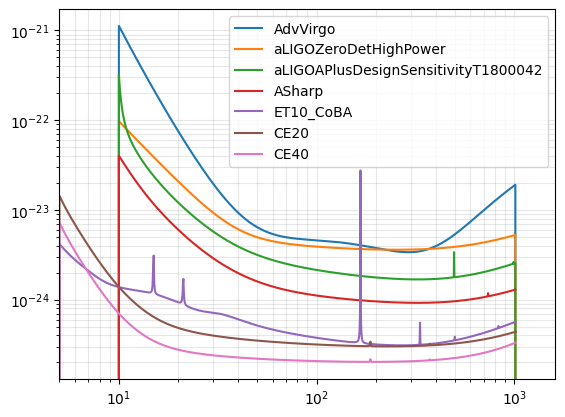

In [75]:
for psd_name, f_low in zip(['AdvVirgo', 
                            'aLIGOZeroDetHighPower', 
                            'aLIGOAPlusDesignSensitivityT1800042', 
                            'ASharp',
                            #'EinsteinTelescopeP1600143',
                            'ET10_CoBA',
                            'CE20', 
                            'CE40'], 
                            #'CosmicExplorerP1600143'], 
                           [10]*4+[5.01]*5):
    try:
        psd_data = generate_psd(psd_name, len(np.arange(f_low,1024,0.1)), 0.1, f_low)
    except:
        print(psd_name)
        psd_data = generate_psd(psd_name, len(np.arange(10,1024,0.1)), 0.1, 10)
    plt.loglog(psd_data.sample_frequencies, psd_data**0.5, label=psd_name)
plt.xlim(5,)
plt.legend()
plt.grid(which='both', alpha=0.3)

## Real Events

In [76]:
data_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/calc_SNR_next_gen/real_events/SNR_calc_output_files/'

In [77]:
netw_labels = {'CE4020ET123_10CoBA_flow_20':'CE4020ET123 @ 20Hz',
               'CE40LIAsharpET123_10CoBA_flow_5':'CE40-LIA#-ET123 @ 5Hz',
               'LHI_all_ASharp_flow_10':'LHI @ A# @ 10Hz',
               'LHV_design_flow_20':'LHV design @ 20Hz',
               'CE4020ET123_10CoBA_flow_5': 'CE4020ET123 @ 5Hz'}

In [78]:
events = {'GW150914':26, 'GW170817_highSpin':33, 'GW190426':9, 'GW200129':27}
events_data_dict = {}
for event in events:
    events_data_dict[event] = {}
    event_files = glob(os.path.join(data_dir, event, '*'))
    for file in event_files:
        netw = file.split('/')[-1].split(f'_{event}_')[0]
        f_low = file.split('_flow_')[-1].split('_')[0]
        samples = dd.io.load(file)
        events_data_dict[event][netw+'_flow_'+f_low] = {'file':file, 'samples':samples['Optimal_SNR']}

In [79]:
events_data_dict['GW150914'].keys()

dict_keys(['CE4020ET123_10CoBA_flow_20', 'CE40LIAsharpET123_10CoBA_flow_5', 'LHV_design_flow_20', 'LHI_all_ASharp_flow_10', 'CE4020ET123_10CoBA_flow_5'])

In [80]:
events_data_dict['GW170817_highSpin']['LHV_design_flow_20']['samples']

,PSD_L1,PSD_H1,PSD_V1,spin1_a,spin2_a,cos_spin1_polar,cos_spin2_polar,cos_theta_jn,lambda1,lambda2,...,delta_f,f_final,dec,trigger_time,polarization,ra,SNR_L1,SNR_H1,SNR_V1,SNR_network
0,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.314164,0.366322,0.626950,-0.159265,-0.541149,10.955751,3629.700305,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,45.326201,53.427474,15.078090,71.668042
1,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.438017,0.823498,0.355876,-0.209122,-0.862513,3.418798,595.661733,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,55.707625,65.964076,17.672722,88.130153
2,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.203453,0.046666,-0.143067,0.766820,-0.698893,693.324738,262.929783,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,51.357732,60.736401,16.523903,81.237715
3,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.631712,0.421674,0.485672,-0.854661,-0.924772,229.555495,1367.059741,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,50.990903,60.389839,16.152481,80.671603
4,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.049502,0.086603,-0.338186,0.460302,-0.983841,159.089051,1026.433531,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,53.900426,63.839907,17.060039,85.275053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.639350,0.879000,0.713016,-0.571544,-0.518021,649.608325,33.073468,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,44.477741,52.385430,14.917587,70.320958
1996,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.284059,0.312608,-0.448484,0.613842,-0.745837,66.248179,418.932911,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,53.690315,63.527550,17.175045,84.931629
1997,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.262956,0.296655,-0.057471,0.127315,-0.982520,615.723788,272.736912,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,54.608232,64.678202,17.285025,86.395028
1998,aLIGOZeroDetHighPower,aLIGOZeroDetHighPower,AdvVirgo,0.013822,0.100833,-0.635194,0.545087,-0.953409,12.272081,1012.123222,...,0.01,8526,-0.408084,1.187009e+09,0.0,3.44616,52.711041,62.429769,16.685729,83.392707


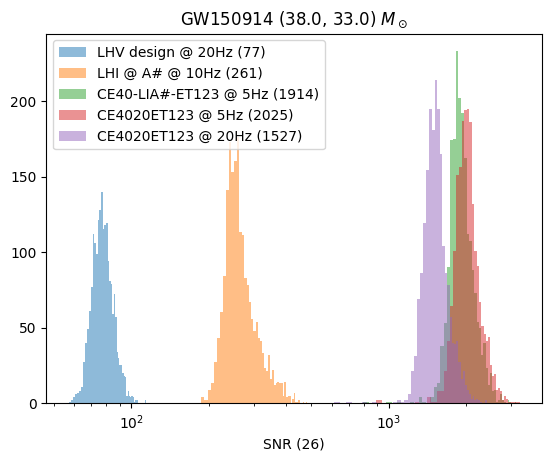

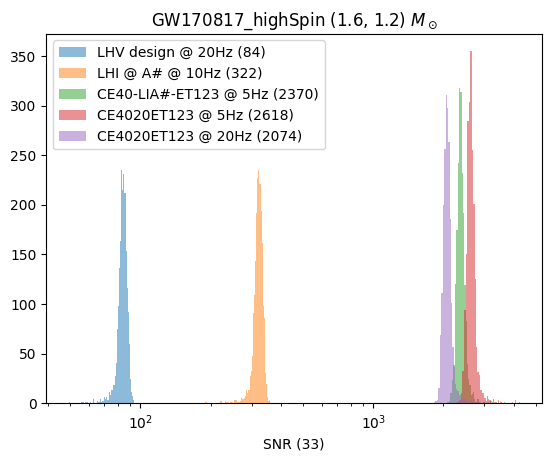

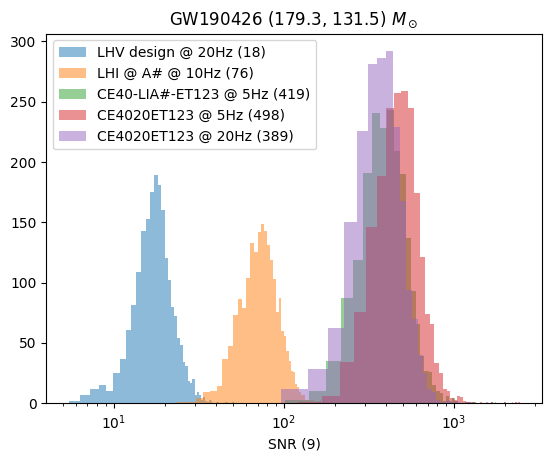

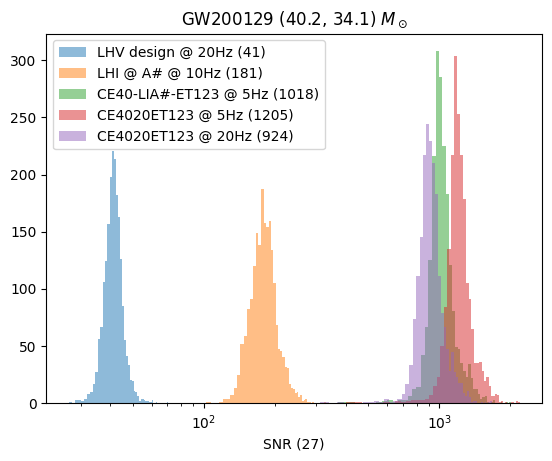

In [81]:
netws = list(events_data_dict['GW150914'].keys())
netws.sort(reverse=True)
for event in events:
    plt.figure()
    #SNR_LH_design = np.sqrt(events_data_dict[event]['LHV_design_flow_20']['samples']['SNR_L1']**2 + events_data_dict[event]['LHV_design_flow_20']['samples']['SNR_H1']**2)
    #plt.hist(SNR_LH_design, label=f'LH design ({round(np.median(SNR_LH_design))})', bins=50, alpha=0.5)
    for netw in netws:
        med_SNR = int(round(np.median(events_data_dict[event][netw]['samples']['SNR_network'])))
        plt.hist(events_data_dict[event][netw]['samples']['SNR_network'], label=f'{netw_labels[netw]} ({med_SNR})', bins=50, alpha=0.5)
    m1_med = round(np.median(events_data_dict[event][netw]['samples']['mass1']),1)
    m2_med = round(np.median(events_data_dict[event][netw]['samples']['mass2']),1)
    plt.title(f'{event} ({m1_med}, {m2_med}) $M_\odot$')
    plt.legend()
    plt.xlabel(f'SNR ({events[event]})')
    plt.xscale('log')

## Function definitions

In [42]:
def get_detected_SNRs(data_dict, ifo_threshold=5, network_threshold=10, method='network', return_detected_dict=False):
    SNR_keys = [key for key in data_dict.keys() if 'SNR' in key]
    detected_bool_dict = {}
    detected_dict = {}
    
    for key in SNR_keys:
        dict_key = key.split('SNR_')[-1]
        
        if "network" in key:
            threshold = network_threshold
        else:
            threshold = ifo_threshold

        detected_bool_dict[dict_key] = data_dict[key] >= threshold
        detected_dict[dict_key] = data_dict[detected_bool_dict[dict_key]]

    if method=='all':
        detected_events_df = data_dict[np.all(tuple(detected_bool_dict.values()), axis=0)]
    elif method=='network':
        detected_events_df = detected_dict['network']

    if return_detected_dict:
        return(detected_events_df, detected_dict)
    else:
        return(detected_events_df)

In [43]:
test_data_local = dd.io.load('../output_data/Test_data/1_day_prec_z_10_local_SNR_data.h5')['Optimal_SNR']

In [47]:
netw_labels = {'CE40_P1600143_CE20ET123':'CE40_P1600143, CE20, ET123',
               'CE40_P1600143_LIAsharpET123':'CE40_P1600143, LI A#, ET123',
               'LHI_all_ASharp':'LHI @ A#',
               'LHV_design':'LHV design',
               'LH_APlus_V_design': 'LH @ A+, V @ design'}

In [48]:
def bin_style(hist_data):
    if len(hist_data)>100:
        bs = 'sqrt'
    else:
        if len(hist_data)>50:
            bs = 'auto'
        else:
            bs = len(hist_data)//3
            if bs==0:
                bs=1
    return(bs)

In [49]:
def plot_efficiency_curve(selected_data, total_data, bins='sqrt', **kwargs):
    ns_sel, bins_sel = np.histogram(selected_data, bins=bins)
    ns_tot, bins_tot = np.histogram(total_data, bins=bins_sel)
    if not np.all(bins_sel == bins_tot):
        raise ValueError("Bins are not equal! Something went wrong.")
    eff_samples = ns_sel/ns_tot
    #plt.bar(bins_sel[:-1], eff_samples, np.diff(bins_sel), **kwargs)
    
    # Using plt.step to create a step-like plot
    line = plt.stairs(eff_samples, bins_sel, **kwargs)
    return(eff_samples, bins_sel)

## BBH

In [50]:
data_dir_bbh = '../output_data/BBH/'

In [51]:
snr_data_bbh = {}
config_bbh = {}
for data_file in list(os.walk(data_dir_bbh))[0][2]:
    key = data_file.split('_PLP_')[0]
    bbh_data = dd.io.load(os.path.join(data_dir_bbh, data_file))
    snr_data_bbh[key] = bbh_data['Optimal_SNR']
    snr_data_bbh[key]['comoving_distance'] = cosmo.comoving_distance(snr_data_bbh[key]['redshift'])
    config_bbh[key] = bbh_data['config']

In [52]:
detected_bbh = {'all':{}, 'network':{}}
for key in snr_data_bbh.keys():
    detected_bbh['all'][key] = get_detected_SNRs(snr_data_bbh[key], method='all')
    detected_bbh['network'][key] = get_detected_SNRs(snr_data_bbh[key], method='network')

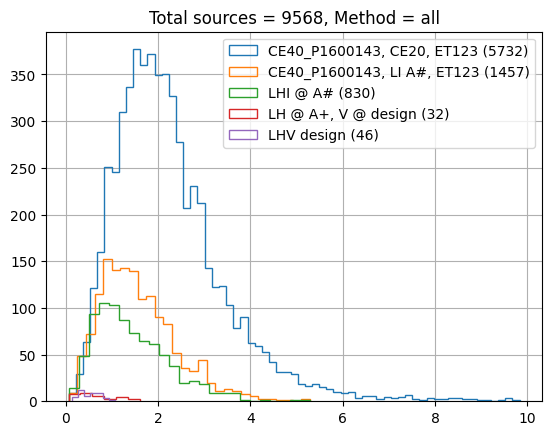

In [53]:
for key in detected_bbh['all'].keys():
    bbh_data = detected_bbh['all'][key]
    plt.hist(bbh_data['redshift'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(bbh_data["redshift"])})', bins='auto')
plt.legend()
plt.title(f'Total sources = {len(snr_data_bbh["CE40_P1600143_CE20ET123"]["mass1"])}, Method = all')
plt.grid()

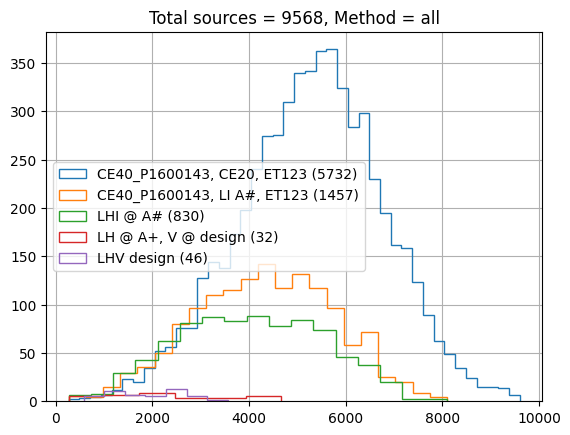

In [54]:
for key in detected_bbh['all'].keys():
    bbh_data = detected_bbh['all'][key]
    plt.hist(bbh_data['comoving_distance'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(bbh_data["comoving_distance"])})', bins='auto')
plt.legend()
plt.title(f'Total sources = {len(snr_data_bbh["CE40_P1600143_CE20ET123"]["mass1"])}, Method = all')
plt.grid()

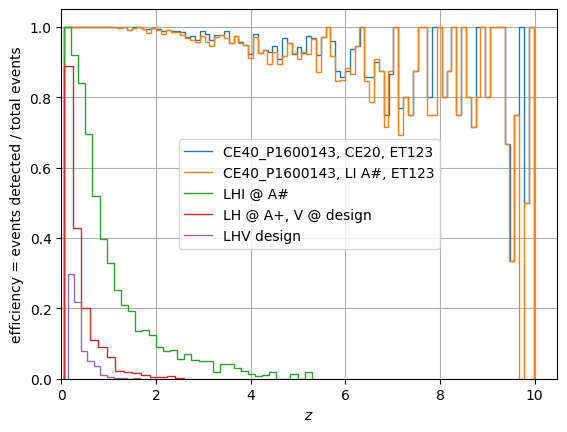

In [55]:
for netw in snr_data_bbh.keys():
    plot_efficiency_curve(detected_bbh['network'][netw]['redshift'], snr_data_bbh[netw]['redshift'], label=netw_labels[netw], zorder=2)
plt.legend(loc=10)
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('$z$')
plt.ylabel('efficiency = events detected / total events')
plt.grid(zorder=0)

/tmp/ipykernel_17358/1059002197.py:6: RuntimeWarning: invalid value encountered in divide
  eff_samples = ns_sel/ns_tot


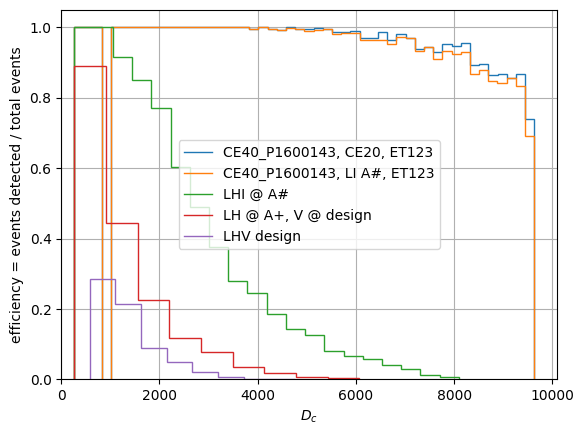

In [56]:
for netw in snr_data_bbh.keys():
    plot_efficiency_curve(detected_bbh['network'][netw]['comoving_distance'], 
                          snr_data_bbh[netw]['comoving_distance'], label=netw_labels[netw], 
                          zorder=2, bins='auto')
plt.legend(loc=10)
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('$D_c$')
plt.ylabel('efficiency = events detected / total events')
plt.grid(zorder=0)

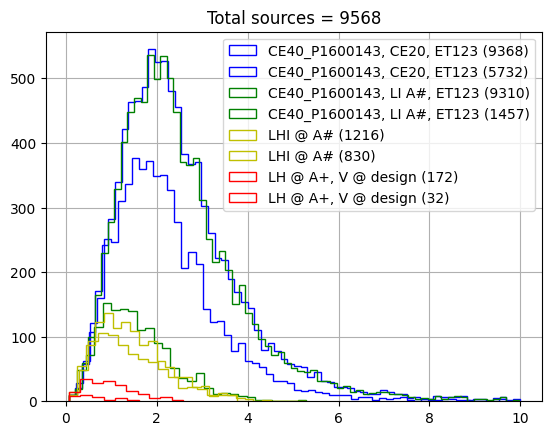

In [57]:
for key, colr in zip(detected_bbh['network'].keys(), ['b', 'g', 'y', 'r']):
    bbh_data = detected_bbh['network'][key]
    plt.hist(bbh_data['redshift'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(bbh_data["redshift"])})', bins='auto', color=colr)
    bbh_data1 = detected_bbh['all'][key]
    plt.hist(bbh_data1['redshift'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(bbh_data1["redshift"])})', bins='auto', ls='--', color=colr)
plt.legend()
plt.title(f'Total sources = {len(snr_data_bbh["CE40_P1600143_CE20ET123"]["mass1"])}')
plt.grid()

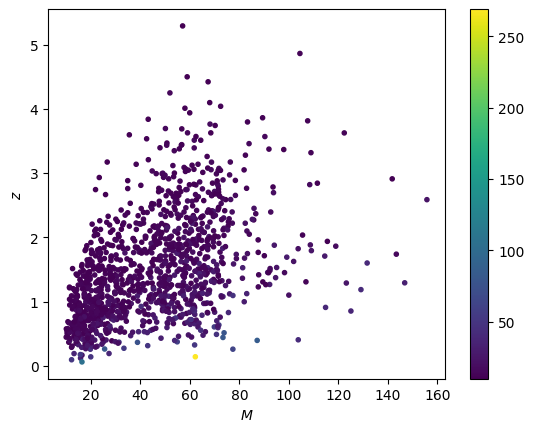

In [58]:
plt.scatter(detected_bbh['network']['LHI_all_ASharp']['srcmtotal'], 
            detected_bbh['network']['LHI_all_ASharp']['redshift'], 
            c=detected_bbh['network']['LHI_all_ASharp']['SNR_network'], marker='.')
plt.xlabel('$M$')
plt.ylabel('$z$')
plt.colorbar()

### Mass populations

In [59]:
def slice_mtotal_pop(arr, mtotal_range):
    """
    Returns: A bool array corresponding to arr, depending on the range provided
    """
    if '<' in mtotal_range:
        max_boundary = float(mtotal_range.split('<')[-1])
        return(arr < max_boundary)
        
    elif '<=' in mtotal_range:
        max_boundary = float(mtotal_range.split('<=')[-1])
        return(arr <= max_boundary)
        
    elif '>' in mtotal_range:
        min_boundary = float(mtotal_range.split('>')[-1])
        return(arr > min_boundary)
        
    elif '>=' in mtotal_range:
        min_boundary = float(mtotal_range.split('>=')[-1])
        return(arr >= min_boundary)
        
    elif '-' in mtotal_range:
        min_boundary, max_boundary = map(float, mtotal_range.split('-'))
        return(np.all((arr >= min_boundary, arr <= max_boundary), axis=0))

In [60]:
detect_type = 'network'
mass_pops_bbh = {}

for m_range in ['<10', '10-30', '30-70', '>70']:
    mass_pops_bbh[m_range] = {}
    for pop, input_dfs_dict in zip(['detected', 'total'], [detected_bbh[detect_type], snr_data_bbh]):
        mass_pops_bbh[m_range][pop] = {}
        for netw in input_dfs_dict.keys():
            bool_arr = slice_mtotal_pop(input_dfs_dict[netw]['srcmtotal'], m_range)
            mass_pops_bbh[m_range][pop][netw] = input_dfs_dict[netw][bool_arr]

In [61]:
input_dfs_dict.keys()

dict_keys(['CE40_P1600143_CE20ET123', 'CE40_P1600143_LIAsharpET123', 'LHI_all_ASharp', 'LH_APlus_V_design', 'LHV_design'])

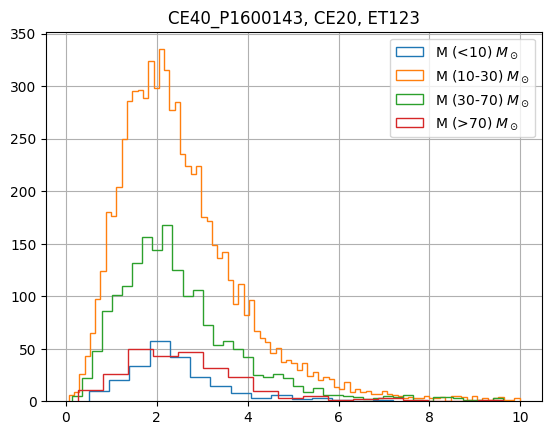

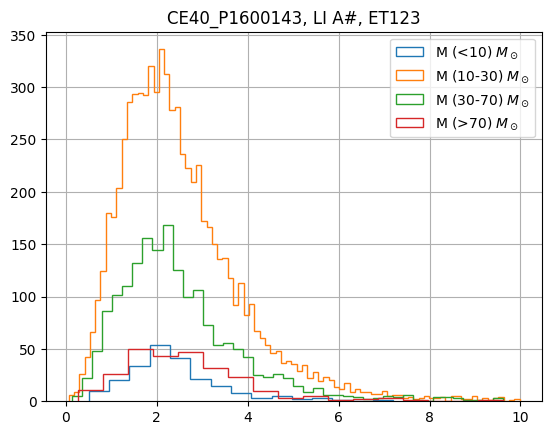

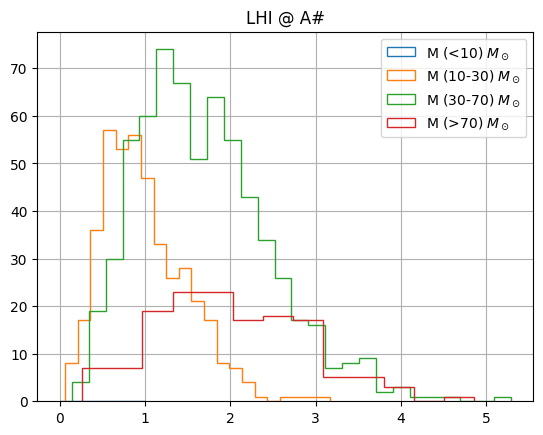

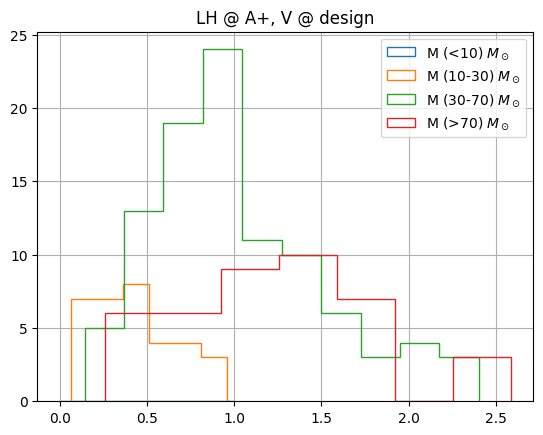

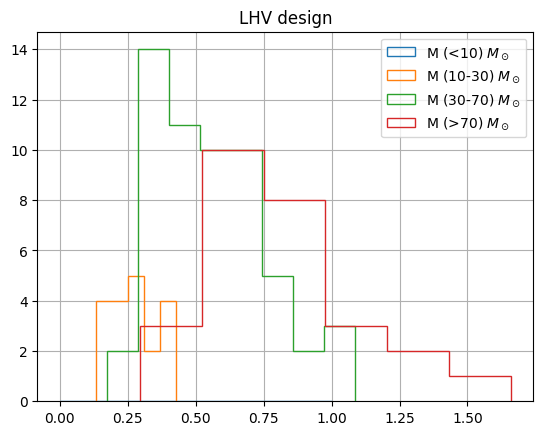

In [62]:
for netw in input_dfs_dict.keys():
    plt.figure()
    for m_range, color in zip(mass_pops_bbh.keys(), colors):
        hist_data = mass_pops_bbh[m_range]['detected'][netw]['redshift']
        plt.hist(hist_data, bins='sqrt', histtype=u'step', label='M ('+m_range+') $M_\odot$', color=color);
    plt.title(netw_labels[netw])
    plt.legend()
    plt.grid()

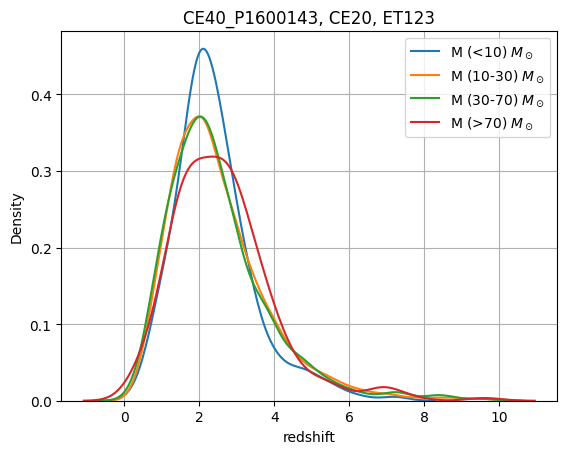

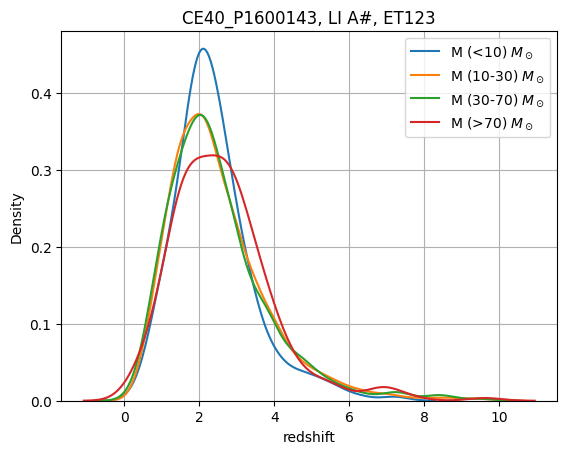

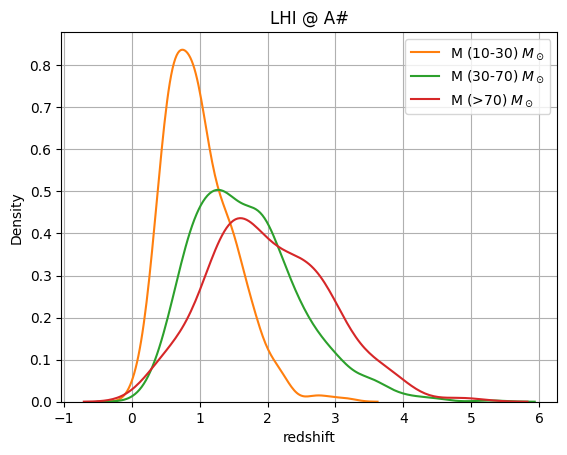

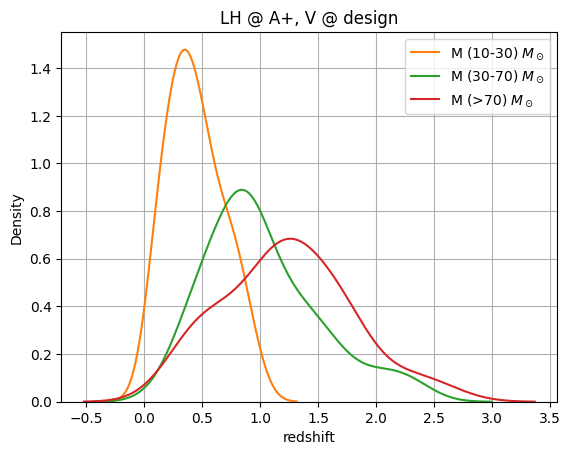

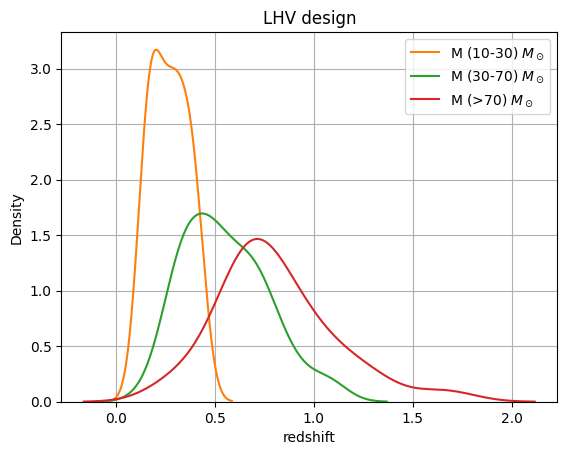

In [63]:
for netw in input_dfs_dict.keys():
    plt.figure()
    for m_range, color in zip(mass_pops_bbh.keys(), colors):
        hist_data = mass_pops_bbh[m_range]['detected'][netw]['redshift']
        sns.kdeplot(hist_data, label='M ('+m_range+') $M_\odot$', color=color);
    plt.title(netw_labels[netw])
    plt.legend()
    plt.grid()

Text(0.5, 1.0, '30 < M < 70')

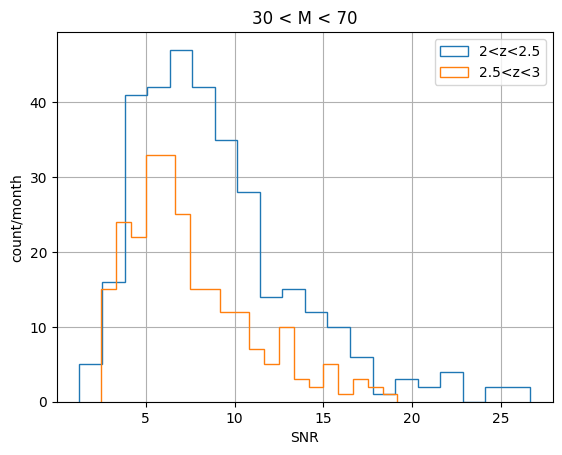

In [64]:
# This is first time we'll be seeing over the SFR peak with a few events which are detectable
plt.hist(mass_pops_bbh['30-70']['total']['LHI_all_ASharp']['SNR_network'][np.all((mass_pops_bbh['30-70']['total']['LHI_all_ASharp']['redshift'] < 2.5, 
                                                                      mass_pops_bbh['30-70']['total']['LHI_all_ASharp']['redshift'] > 2), 
                                                                                 axis=0)], bins=20, histtype=u'step', label='2<z<2.5');
plt.hist(mass_pops_bbh['30-70']['total']['LHI_all_ASharp']['SNR_network'][np.all((mass_pops_bbh['30-70']['total']['LHI_all_ASharp']['redshift'] < 3, 
                                                                      mass_pops_bbh['30-70']['total']['LHI_all_ASharp']['redshift'] > 2.5), 
                                                                                 axis=0)], bins=20, histtype=u'step', label='2.5<z<3');
plt.xlabel('SNR')
plt.grid()
plt.ylabel('count/month')
plt.legend()
plt.title('30 < M < 70')

/tmp/ipykernel_17358/1059002197.py:6: RuntimeWarning: invalid value encountered in divide
  eff_samples = ns_sel/ns_tot


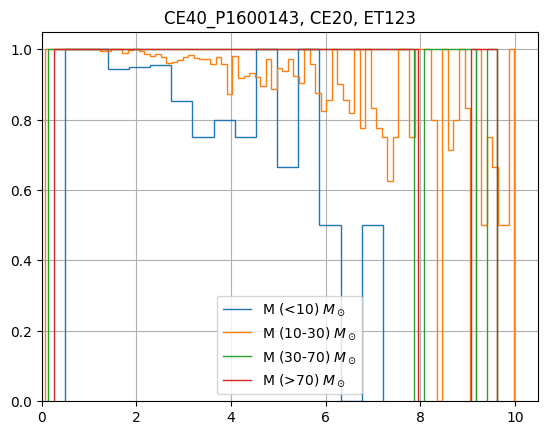

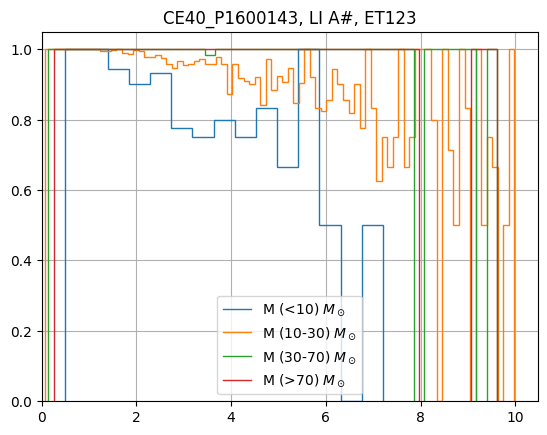

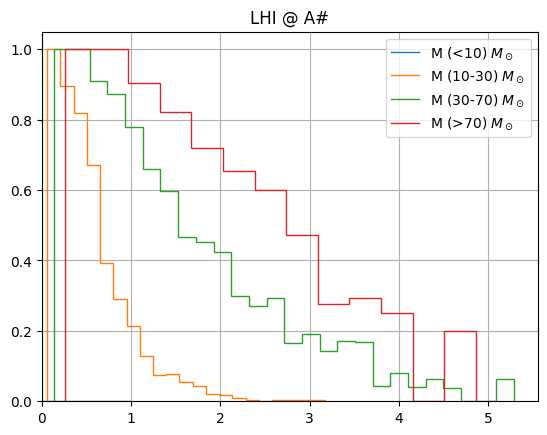

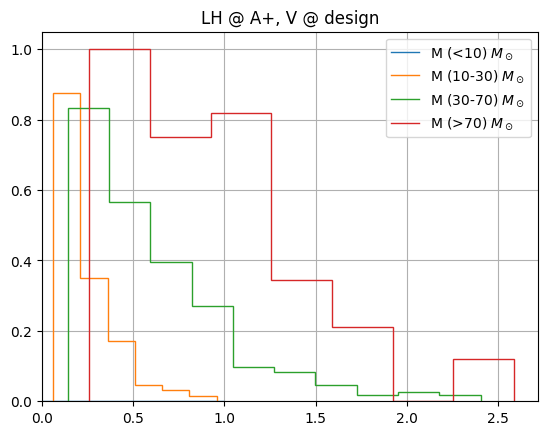

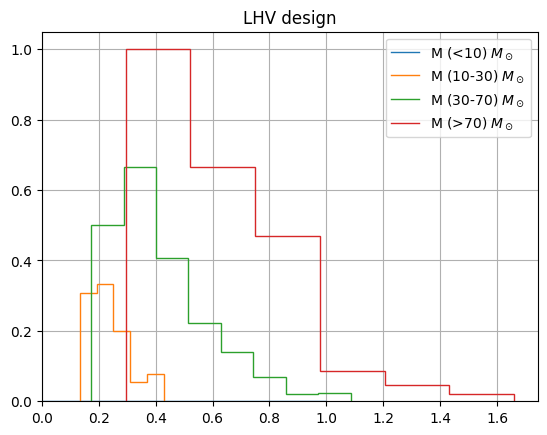

In [65]:
for netw in input_dfs_dict.keys():
    plt.figure()
    for m_range, color in zip(mass_pops_bbh.keys(), colors):
        hist_data_sel = mass_pops_bbh[m_range]['detected'][netw]['redshift']
        hist_data_tot = mass_pops_bbh[m_range]['total'][netw]['redshift']
        plot_efficiency_curve(hist_data_sel, hist_data_tot, bins='sqrt', label='M ('+m_range+') $M_\odot$', color=color, zorder=2);
    plt.title(netw_labels[netw])
    plt.legend()
    plt.xlim(0,)
    plt.grid()

## NSBH

In [66]:
data_dir_nsbh = '../output_data/NSBH/'

In [67]:
snr_data_nsbh = {}
config_nsbh = {}
for data_file in list(os.walk(data_dir_nsbh))[0][2]:
    key = data_file.split('_US_')[0]
    nsbh_data = dd.io.load(os.path.join(data_dir_nsbh, data_file))
    snr_data_nsbh[key] = nsbh_data['Optimal_SNR']
    snr_data_nsbh[key]['comoving_distance'] = cosmo.comoving_distance(snr_data_nsbh[key]['redshift'])
    config_nsbh[key] = nsbh_data['config']

In [68]:
detected_nsbh = {'all':{}, 'network':{}}
for key in snr_data_nsbh.keys():
    detected_nsbh['all'][key] = get_detected_SNRs(snr_data_nsbh[key], method='all')
    detected_nsbh['network'][key] = get_detected_SNRs(snr_data_nsbh[key], method='network')

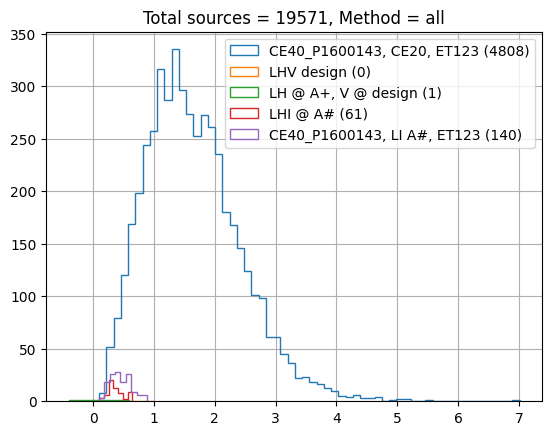

In [69]:
for key in detected_nsbh['all'].keys():
    nsbh_data = detected_nsbh['all'][key]
    plt.hist(nsbh_data['redshift'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(nsbh_data["redshift"])})', bins='auto')
plt.legend()
plt.title(f'Total sources = {len(snr_data_nsbh["CE40_P1600143_CE20ET123"]["mass1"])}, Method = all')
plt.grid()

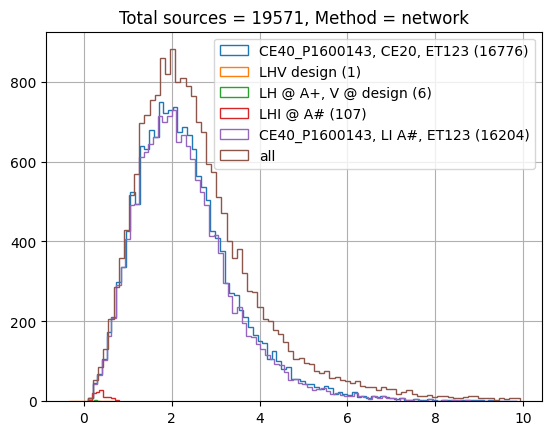

In [70]:
for key in detected_nsbh['network'].keys():
    nsbh_data = detected_nsbh['network'][key]
    plt.hist(nsbh_data['redshift'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(nsbh_data["redshift"])})', bins='auto')
plt.hist(snr_data_nsbh['CE40_P1600143_CE20ET123']['redshift'], histtype=u'step', label='all', bins='auto')
plt.legend()
plt.title(f'Total sources = {len(snr_data_nsbh["LHV_design"]["mass1"])}, Method = network')
plt.grid()

/tmp/ipykernel_17358/1059002197.py:6: RuntimeWarning: invalid value encountered in divide
  eff_samples = ns_sel/ns_tot


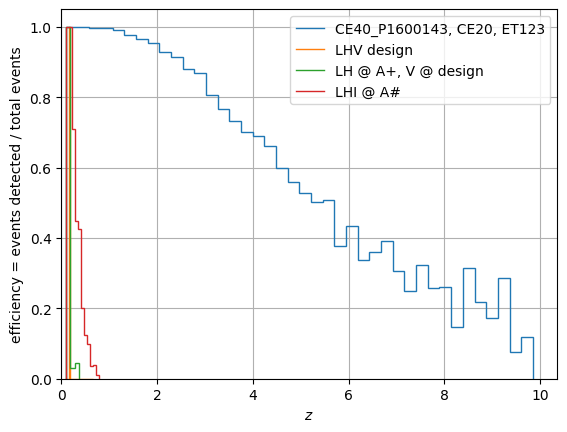

In [71]:
for netw, bns in zip(snr_data_nsbh.keys(), [40, 40, 'sqrt', 'sqrt']):
    vals = plot_efficiency_curve(detected_nsbh['network'][netw]['redshift'], snr_data_nsbh[netw]['redshift'], label=netw_labels[netw], bins=bns, zorder=2)
plt.legend()
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('$z$')
plt.ylabel('efficiency = events detected / total events')
plt.grid()

## BNS

In [72]:
data_dir_bns = '../output_data/BNS/'

In [73]:
snr_data_bns = {}
config_bns = {}
for data_file in list(os.walk(data_dir_bns))[0][2]:
    key = data_file.split('_DG_')[0]
    bns_data = dd.io.load(os.path.join(data_dir_bns, data_file))
    snr_data_bns[key] = bns_data['Optimal_SNR']
    snr_data_bns[key]['comoving_distance'] = cosmo.comoving_distance(snr_data_bns[key]['redshift'])
    config_bns[key] = bns_data['config']

In [92]:
print('srcmchirp Mean:', np.mean(snr_data_bns['CE40_P1600143_LIAsharpET123']['srcmchirp']))
print('srcmchirp Std:', np.std(snr_data_bns['CE40_P1600143_LIAsharpET123']['srcmchirp']))

srcmchirp Mean: 1.2688649034774155
srcmchirp Std: 0.12486609612126023


In [74]:
detected_bns = {'all':{}, 'network':{}}
for key in snr_data_bns.keys():
    detected_bns['all'][key] = get_detected_SNRs(snr_data_bns[key], method='all')
    detected_bns['network'][key] = get_detected_SNRs(snr_data_bns[key], method='network')

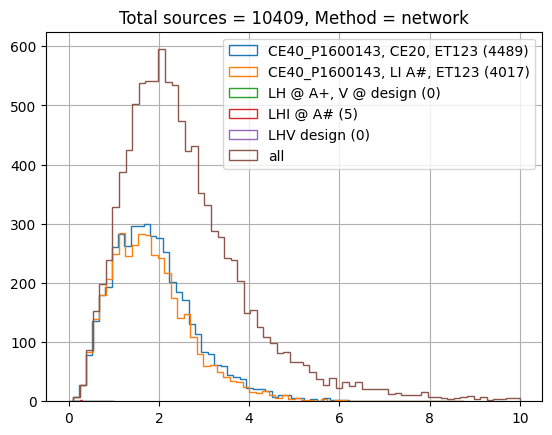

In [75]:
for key in detected_bns['network'].keys():
    bns_data = detected_bns['network'][key]
    plt.hist(bns_data['redshift'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(bns_data["redshift"])})', bins='auto')
plt.hist(snr_data_bns['CE40_P1600143_CE20ET123']['redshift'], histtype=u'step', bins='auto', label='all')
plt.legend()
plt.title(f'Total sources = {len(snr_data_bns["CE40_P1600143_LIAsharpET123"]["mass1"])}, Method = network')
plt.grid()

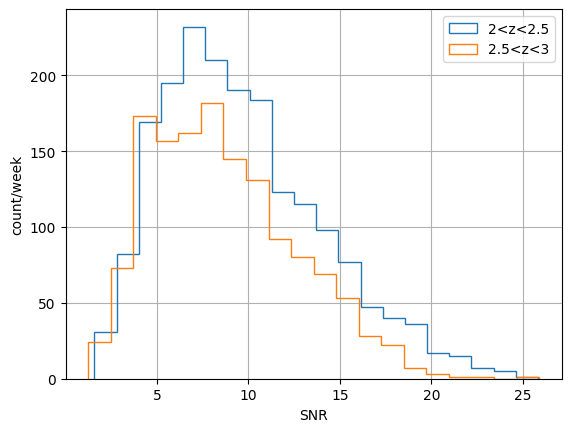

In [76]:
plt.hist(snr_data_bns['CE40_P1600143_CE20ET123']['SNR_network'][np.all((snr_data_bns['CE40_P1600143_CE20ET123']['redshift'] < 2.5, 
                                                                      snr_data_bns['CE40_P1600143_CE20ET123']['redshift'] > 2), 
                                                                                 axis=0)], bins=20, histtype=u'step', label='2<z<2.5');
plt.hist(snr_data_bns['CE40_P1600143_CE20ET123']['SNR_network'][np.all((snr_data_bns['CE40_P1600143_CE20ET123']['redshift'] < 3, 
                                                                      snr_data_bns['CE40_P1600143_CE20ET123']['redshift'] > 2.5), 
                                                                                 axis=0)], bins=20, histtype=u'step', label='2.5<z<3');
plt.xlabel('SNR')
plt.grid()
plt.ylabel('count/week')
plt.legend()
#plt.title('30 < M < 70')

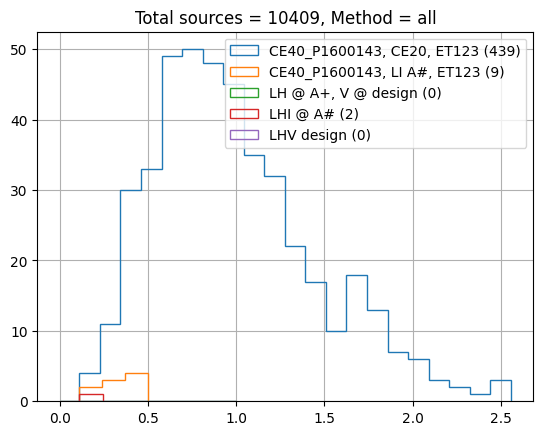

In [77]:
for key in detected_bns['all'].keys():
    bns_data = detected_bns['all'][key]
    plt.hist(bns_data['redshift'], histtype=u'step', 
             label=f'{netw_labels[key]} ({len(bns_data["redshift"])})', bins='sqrt')
plt.legend()
plt.title(f'Total sources = {len(snr_data_bns["CE40_P1600143_LIAsharpET123"]["mass1"])}, Method = all')
plt.grid()

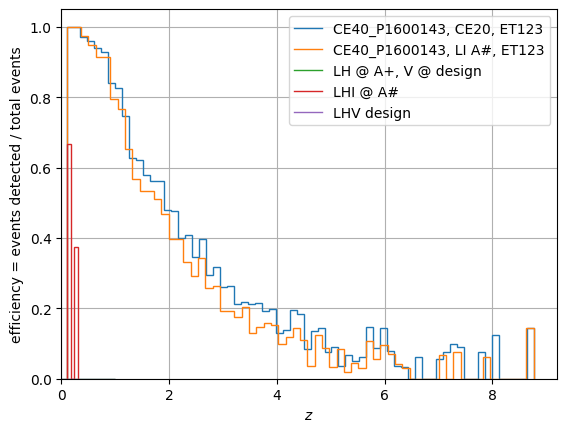

In [78]:
for netw in snr_data_bns.keys():
    vals = plot_efficiency_curve(detected_bns['network'][netw]['redshift'], snr_data_bns[netw]['redshift'], label=netw_labels[netw], zorder=2)
plt.legend()
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('$z$')
plt.ylabel('efficiency = events detected / total events')
plt.grid()

## Efficiency curves comparison

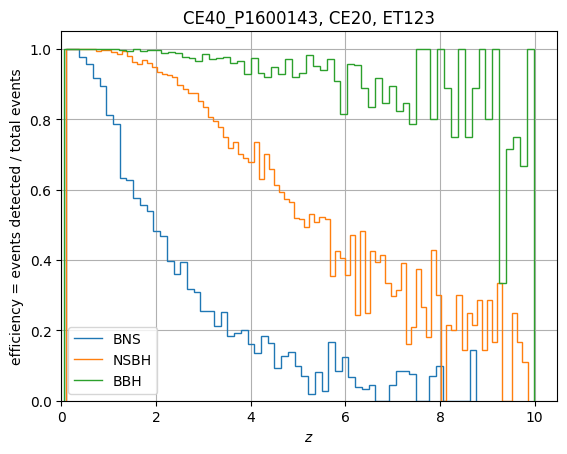

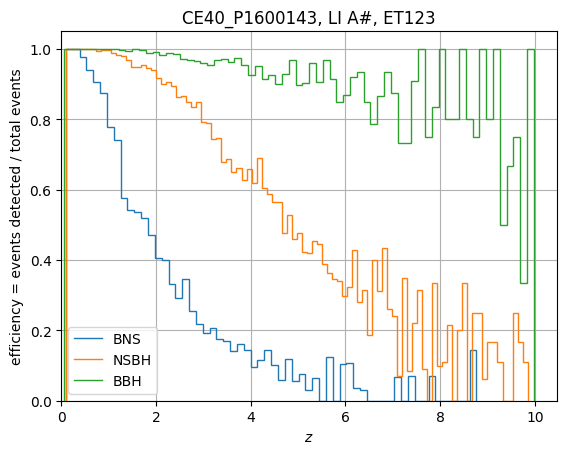

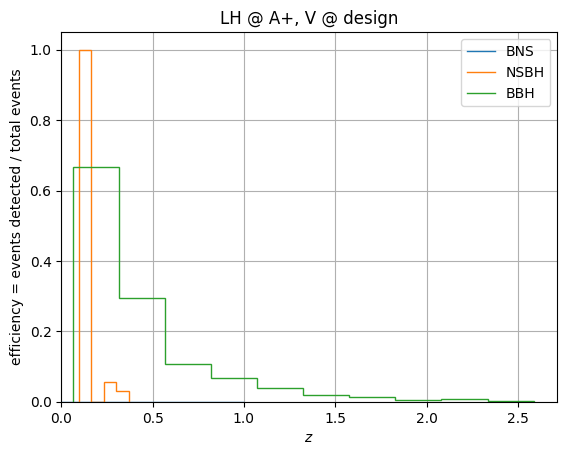

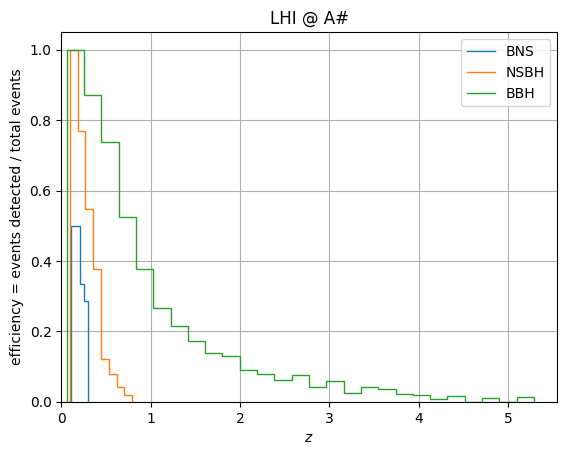

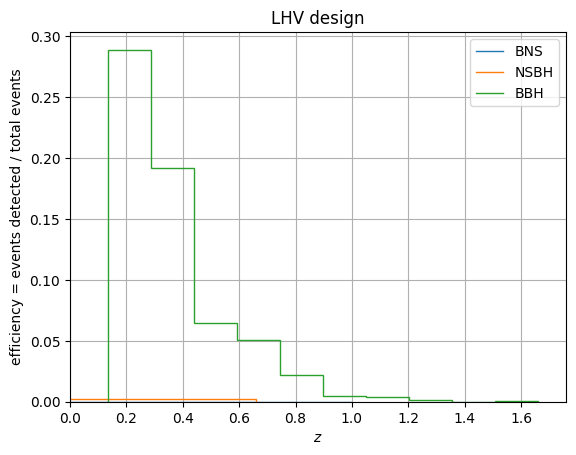

In [79]:
for netw in snr_data_bns.keys():
    plt.figure()
    for det_data, total_data, label in zip([detected_bns, detected_nsbh, detected_bbh], [snr_data_bns, snr_data_nsbh, snr_data_bbh], ['BNS', 'NSBH', 'BBH']):
        plot_efficiency_curve(det_data['network'][netw]['redshift'], 
                              total_data[netw]['redshift'], bins='auto', label=label, zorder=2)
    plt.legend()
    plt.xlim(0,)
    plt.grid()
    plt.xlabel('$z$')
    plt.ylabel('efficiency = events detected / total events')
    plt.title(netw_labels[netw])

/tmp/ipykernel_17358/1059002197.py:6: RuntimeWarning: invalid value encountered in divide
  eff_samples = ns_sel/ns_tot


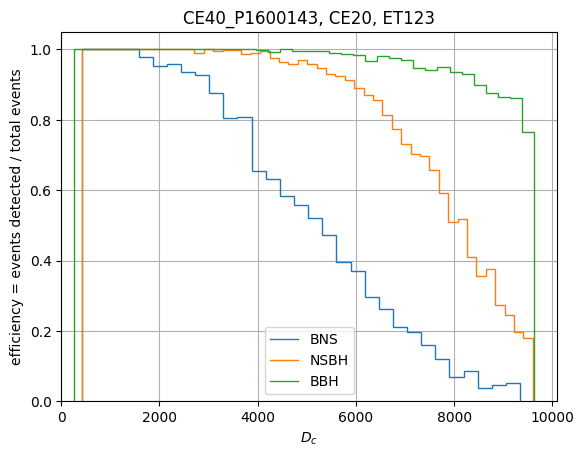

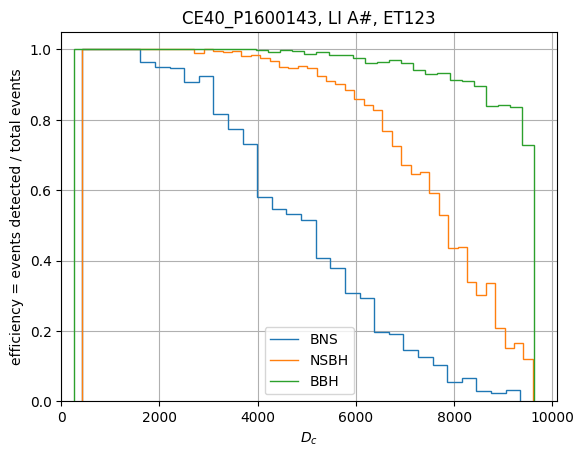

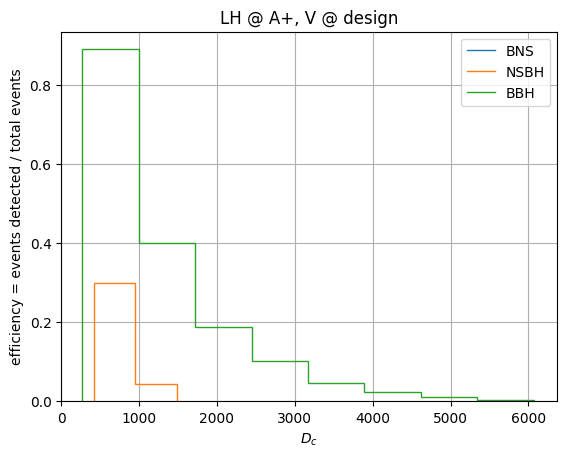

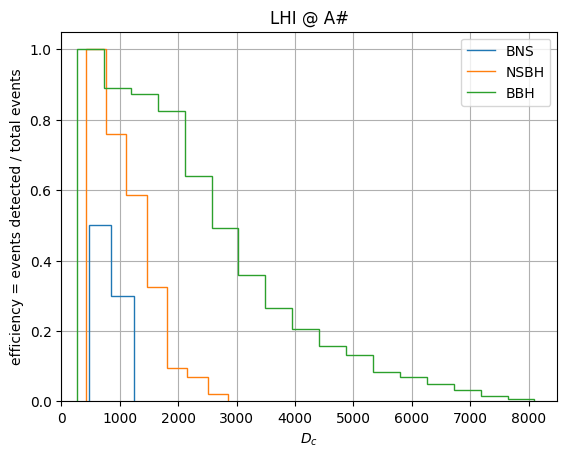

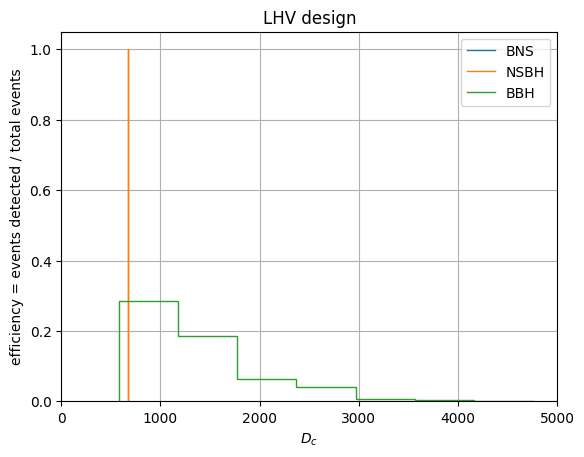

In [80]:
for netw in snr_data_bns.keys():
    plt.figure()
    for det_data, total_data, label in zip([detected_bns, detected_nsbh, detected_bbh], [snr_data_bns, snr_data_nsbh, snr_data_bbh], ['BNS', 'NSBH', 'BBH']):
        plot_efficiency_curve(det_data['network'][netw]['comoving_distance'], 
                              total_data[netw]['comoving_distance'], bins='scott', label=label, zorder=2)
    plt.legend()
    plt.xlim(0,)
    plt.grid()
    plt.xlabel('$D_c$')
    plt.ylabel('efficiency = events detected / total events')
    plt.title(netw_labels[netw])

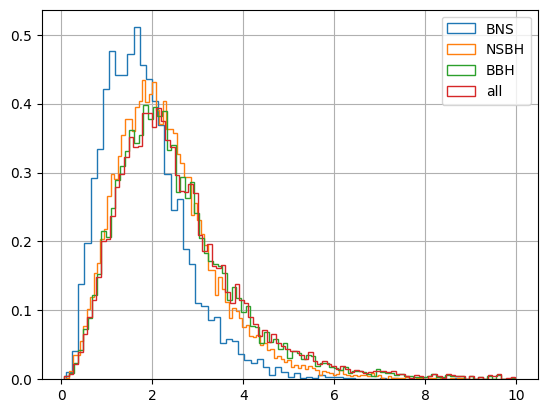

In [81]:
plt.hist(detected_bns['network']['CE40_P1600143_LIAsharpET123']['redshift'], histtype=u'step', bins='sqrt', density=True, label='BNS');
plt.hist(detected_nsbh['network']['CE40_P1600143_LIAsharpET123']['redshift'], histtype=u'step', bins='sqrt', density=True, label='NSBH');
plt.hist(detected_bbh['network']['CE40_P1600143_LIAsharpET123']['redshift'], histtype=u'step', bins='sqrt', density=True, label='BBH');
plt.hist(snr_data_bbh['CE40_P1600143_LIAsharpET123']['redshift'], histtype=u'step', bins='sqrt', density=True, label='all');
plt.grid()
plt.legend()